# Introduction: Multiclass Classification with a Neural Network

Welcome to this Jupyter Notebook, where we'll be diving deep into the captivating realm of neural networks using the distinguished **Wine Dataset**. This dataset, stemming from a meticulous chemical analysis of wines from a specific region in Italy, offers a unique opportunity to delve into the world of multi-class classification. In this analysis, we'll architect a sophisticated neural network model to classify wine samples into one of three cultivars based on their distinct chemical compositions.

### Objective:
Our primary mission is to discern the intricate relationships between the chemical constituents of wines and their respective cultivars. By designing a neural network model, we aspire to categorize the wines into their correct cultivars based on these chemical attributes. We will gauge the efficacy of our model using a plethora of metrics, ensuring its precision and reliability.

$$\Large \displaystyle \hat{y}_i = f(W \cdot x_i + b)$$

 - \$\hat{y}_i\$ is the predicted cultivar label for the \$i^{th}\$ wine sample.
 - \$W\$ symbolizes the weight matrix of the neural network.
 - \$x_i\$ represents the feature vector for the \$i^{th}\$ wine sample.
 - \$b\$ is the bias vector intrinsic to the neural network.
 - \$f\$ denotes the activation function employed within the neural network.

### Dataset Overview:
The Wine Dataset is an iconic dataset in the machine learning community. Originating from a chemical analysis of wines grown in Italy, it encompasses three distinct cultivars, each with 50 instances. The dataset boasts 13 features, each representing a specific chemical constituent found in the wines.

### Structure of this Notebook:
1. [Installing and Importing Necessary Libraries](#ch1)
2. [Loading the Wine Dataset](#ch2)
3. [Splitting the Data](#ch3)
4. [Data Processing](#ch4)
5. [Constructing and Compiling the Neural Network Model](#ch5)
6. [Training the Neural Network](#ch6)
7. [Model Performance Visualization](#ch7)
8. [Model Evaluation on Test Data](#ch8)
9. [Confusion Matrix](#ch9)
10. [Classification Report](#ch10)
11. [Conclusion](#ch11)

Let's embark on this analytical journey!

## 1. Installing and Importing Necessary Libraries <a id='ch1'></a>

Before starting our analysis, we need to import the necessary Python libraries that will be used throughout this notebook:

- **`pandas`** and **`numpy`**: Foundational libraries for data manipulation, analysis, and numerical operations. They provide data structures for efficiently storing large datasets and tools for reshaping, aggregating, and merging data.

- **`matplotlib`** and **`seaborn`**: Essential libraries for data visualization. They offer a wide range of plotting tools and techniques that can enhance the understanding of our data.

- **`IPython.display`**: Provides utilities for displaying objects in Jupyter, enhancing the interactivity and presentation of our notebook.

- **`sklearn.datasets`**: From scikit-learn, this module allows us to fetch datasets, including the Wine dataset, providing a convenient way to load data for our analysis.

- **`sklearn.model_selection`**: This module offers various utilities for model selection, including `train_test_split` for partitioning our data.

- **`sklearn.preprocessing`**, **`sklearn.decomposition`**, and **`sklearn.pipeline`**: Offer common utility functions and transformer classes to change raw feature vectors into a representation more suitable for downstream estimators. We'll use `StandardScaler` to standardize features, `PCA` for dimensionality reduction, and `Pipeline` to streamline many of the routine processes.

- **`tensorflow`** and **`keras`**: Libraries for building and training neural networks. They provide a wide range of tools and utilities for deep learning, allowing us to construct, train, and evaluate neural network models. Additionally, we'll be using advanced layers like `Dropout` for regularization and `BatchNormalization` to normalize activations in the network.

- **`sklearn.metrics`**: Provides functions for model evaluation, including `classification_report` and `accuracy_score` to measure the performance of our classification model, and `confusion_matrix` to evaluate the accuracy of classification by comparing the actual and predicted classes.

By importing these libraries upfront, we ensure a smooth workflow, allowing us to focus on the core analysis without interruptions.

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML, Markdown

# Dataset
from sklearn.datasets import load_wine

# Data preprocessing and utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Metrics and evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## 2. Loading the Wine Dataset <a id='ch2'></a>

The **Wine Dataset** is a result of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The dataset is often used in classification tasks in machine learning to distinguish between the three types of wines based on their chemical properties.

The dataset consists of **178 samples** from wines, with each wine being classified into one of three classes. Thirteen different measurements were taken for different constituents found in the three types of wine:

- `alcohol`: The amount of alcohol present in the wine.
- `malic_acid`: A type of acid found in wine.
- `ash`: A measure of the total ash content in the wine.
- `alcalinity_of_ash`: Represents the alkalinity of the ash present in the wine.
- `magnesium`: The amount of magnesium in the wine.
- `total_phenols`: Total amount of phenols present in the wine.
- `flavanoids`: A subset of phenols that contribute to the wine's flavor and mouthfeel.
- `nonflavanoid_phenols`: Phenols that are not flavanoids.
- `proanthocyanins`: A type of flavanoid found in the wine.
- `color_intensity`: The intensity of the wine's color.
- `hue`: Describes the kind of color the wine has.
- `od280/od315_of_diluted_wines`: A measure used to quantify the wine's quality.
- `proline`: An amino acid that can affect the wine's flavor.

These features capture various chemical characteristics of the wines, providing a comprehensive profile of each wine's chemical composition. Collectively, they have been found to be discriminative enough to distinguish between the three types of wines.

To load the dataset, we use the `load_wine` function from scikit-learn. This function provides a convenient way to load the Wine dataset, making it easy to access for machine learning and data analysis.

In [2]:
# Load the Wine dataset
wine = load_wine()

# Convert the dataset to a pandas DataFrame
data = pd.DataFrame(data=wine.data, columns=wine.feature_names)
data['target'] = wine.target

# Display the first few rows of the dataset
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## 3. Splitting the Data <a id='ch3'></a>

Before training our neural network model, it's crucial to partition the dataset into two subsets: a <span style="color:red">**training set**</span> and a <span style="color:red">**testing set**</span>. This division allows us to train our model on one subset of the data and subsequently evaluate its performance on an independent, unseen subset. Adopting this strategy provides insight into how well our model will likely generalize to new, unseen data.

For this task, we employ the `train_test_split` function from scikit-learn:

- `X_train`, `y_train`: These represent the features and target variable for the training set, respectively. Our model will be trained using this data.

- `X_test`, `y_test`: These denote the features and target variable for the testing set, respectively. This data will be instrumental in assessing the model's performance.

We've allocated 20% of the data for testing purposes (`test_size=0.2`). The `random_state` parameter is set to 1337, ensuring reproducibility in our data splits. This guarantees that each time we execute this code, the same train/test partition is maintained, facilitating consistent results and comparisons.

In [3]:
# Separate features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 142 samples
Testing set size: 36 samples


## 4. Data Processing <a id='ch4'></a>

Data preprocessing is an indispensable step in the machine learning workflow. It entails transforming the raw data to make it suitable for model training. For the **Wine Dataset**, our preprocessing tasks will be streamlined:

1. <span style="color:red">**Standardization**</span>: Neural networks often benefit from having input features that are on a similar scale, with a mean close to 0 and a standard deviation close to 1. This is because features with vastly different scales can result in uneven weight updates, potentially causing the model to converge to a suboptimal solution or even fail to converge at all. 
 - **StandardScaler**: We'll use the `StandardScaler` from scikit-learn to standardize our features. This scaler subtracts the mean and divides by the standard deviation for each feature, ensuring that the transformed feature has a mean of 0 and a standard deviation of 1.

2. <span style="color:red">**Dimensionality Reduction**</span>: As datasets grow in complexity, they can contain redundant or irrelevant features that don't contribute much to the predictive power of the model. Reducing the dimensionality of the dataset can help in speeding up the training process and potentially lead to a model that generalizes better.
 - **PCA (Principal Component Analysis)**: We'll employ PCA to reduce the dimensionality of our dataset. PCA is a technique that transforms the original features into a new set of features, which are linear combinations of the original features. We've chosen to retain 10 principal components for our dataset.

3. <span style="color:red">**Constructing the Preprocessing Pipeline**</span>: To ensure a consistent application of preprocessing steps, we'll employ a `Pipeline`. This tool allows us to define a series of transformations that will be applied in sequence. For our dataset:
 - **Pipeline**: Our pipeline will begin with the standardization step, followed by dimensionality reduction using PCA. This ensures that every time we pass data through this pipeline, it undergoes the same sequence of transformations, maintaining consistency and reducing the potential for errors.

By diligently preprocessing our data, we set the stage for the subsequent modeling phase, ensuring that our neural network operates on standardized and well-structured data.

In [4]:
# Create a pipeline for data preprocessing
preprocessor = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('pca', PCA(n_components=10))  # Reduce dimensionality
])

# Fit the preprocessor to the training data and transform it
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

## 5. Constructing and Compiling the Neural Network Model <a id='ch5'></a>

With our data preprocessed and ready, the next pivotal step is to construct our neural network model. Neural networks are a subset of machine learning models inspired by the structure of the human brain. They consist of interconnected nodes (neurons) organized into layers. For our analysis, we'll be using the `Sequential` model from TensorFlow's Keras API, which allows for the linear stacking of layers.

The construction and training of our neural network involve several steps:

- <span style="color:red">**Building the Neural Network Architecture**</span>: Our neural network will comprise multiple layers:
  - **Input Layer**: This layer will have 256 neurons and use the ReLU (Rectified Linear Unit) activation function. The `input_shape` matches the number of features in our dataset. We also introduce `BatchNormalization` to normalize the activations of the neurons, ensuring the network remains stable throughout training. A `Dropout` layer is added to prevent overfitting by randomly setting a fraction of the input units to 0 during training.
  
  - **Hidden Layers**: We have four hidden layers. The first two hidden layers have 128 neurons each, and the third and fourth have 64 and 32 neurons respectively. All of them use the ReLU activation function. Each of these layers is followed by `BatchNormalization` and `Dropout` layers, ensuring consistent normalization and regularization throughout the network.
  
  - **Output Layer**: This layer will have 3 neurons, corresponding to the three classes of the Wine dataset. It uses the softmax activation function, ensuring the output values are probabilities that sum up to 1.

- <span style="color:red">**Compiling the Model**</span>: Once the architecture is defined, we need to compile the model. This step specifies the optimizer, loss function, and metrics for evaluation. We're using:
  - **Optimizer**: Adam, an adaptive learning rate optimization algorithm that's efficient and requires little memory.
  - **Loss Function**: `sparse_categorical_crossentropy`, suitable for multi-class classification problems where labels are integers.
  - **Metrics**: Accuracy, which calculates the proportion of correctly predicted classifications in the dataset.

- <span style="color:red">**Model Summary**</span>: After compiling, we display a summary of our model's architecture, showing the layers, their type, output shape, and the number of parameters.

By meticulously constructing and compiling our neural network, we lay the groundwork for the subsequent training phase, ensuring our model is well-suited to recognize patterns in the Wine dataset.

In [5]:
from tensorflow.keras.layers import BatchNormalization

# Build the Neural Network Model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_preprocessed.shape[1],)),  # Input layer
    BatchNormalization(),
    Dropout(0.4),  # Dropout layer to prevent overfitting
    
    Dense(128, activation='relu'),  # Hidden layer 1
    BatchNormalization(),
    Dropout(0.4),  # Dropout layer
    
    Dense(128, activation='relu'),  # Hidden layer 2
    BatchNormalization(),
    Dropout(0.4),  # Dropout layer
    
    Dense(64, activation='relu'),  # Hidden layer 3
    BatchNormalization(),
    Dropout(0.4),  # Dropout layer
    
    Dense(32, activation='relu'),  # Hidden layer 4
    BatchNormalization(),
    Dropout(0.4),  # Dropout layer
    
    Dense(3, activation='softmax')  # Output layer
])

# Compile the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2816      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

## 6. Training the Neural Network <a id='ch6'></a>

With our neural network model constructed and compiled, the next step is to train it using our preprocessed training data. Training a neural network involves feeding it data and adjusting the internal parameters to minimize the prediction error. The process is iterative, with the model making predictions and updating its weights and biases in response to the error it made.

Here's a breakdown of our training process:

- <span style="color:red">**Initial Training Phase**</span>: We start by training the model for 40 epochs without displaying the training logs (`verbose=0`). An epoch is a single pass through the entire training dataset. This initial phase allows the model to adjust its weights and biases based on the data, setting the stage for more refined training in the subsequent phase.

- <span style="color:red">**Refined Training Phase**</span>: After the initial 40 epochs, we continue training the model for an additional 10 epochs, this time displaying the training logs (`verbose=1`). This provides insights into the model's performance, showing metrics like loss and accuracy for both the training and validation datasets. The validation dataset, which is a subset of the training data (`validation_split=0.2`), helps monitor the model's performance on unseen data during training, aiding in early detection of overfitting.

The `batch_size` parameter is set to 32, meaning the model updates its weights after every 32 samples. This batched approach helps in stabilizing the training process and achieving faster convergence.

By the end of the 50 epochs, our neural network will have adjusted its parameters to better predict the target variable, setting the stage for evaluation and performance assessment.

In [6]:
# Train the model for the first 40 epochs without showing logs
model.fit(X_train_preprocessed, y_train, epochs=40, batch_size=32, validation_split=0.2, verbose=0)

# Train the model for the last 10 epochs with logs
history = model.fit(X_train_preprocessed, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
4/4 [==============================] - 0s 46ms/step - loss: 0.1481 - accuracy: 0.9735 - val_loss: 0.1950 - val_accuracy: 0.9655
Epoch 2/10
4/4 [==============================] - 0s 34ms/step - loss: 0.2350 - accuracy: 0.9027 - val_loss: 0.1839 - val_accuracy: 0.9655
Epoch 3/10
4/4 [==============================] - 0s 27ms/step - loss: 0.2060 - accuracy: 0.9381 - val_loss: 0.1731 - val_accuracy: 0.9655
Epoch 4/10
4/4 [==============================] - 0s 30ms/step - loss: 0.2237 - accuracy: 0.9115 - val_loss: 0.1635 - val_accuracy: 0.9655
Epoch 5/10
4/4 [==============================] - 0s 33ms/step - loss: 0.1305 - accuracy: 0.9646 - val_loss: 0.1539 - val_accuracy: 0.9655
Epoch 6/10
4/4 [==============================] - 0s 34ms/step - loss: 0.1330 - accuracy: 0.9646 - val_loss: 0.1468 - val_accuracy: 0.9655
Epoch 7/10
4/4 [==============================] - 0s 29ms/step - loss: 0.1788 - accuracy: 0.9646 - val_loss: 0.1411 - val_accuracy: 0.9655
Epoch 8/10
4/4 [===========

## 7. Model Performance Visualization <a id='ch7'></a>

After training our neural network, it's essential to visualize its performance over the training epochs. This visualization helps in understanding how the model learned and adjusted its parameters over time. Specifically, we're interested in two key metrics:

1. <span style="color:red">**Model Accuracy**</span>: This metric represents the proportion of correct predictions made by the model. A higher accuracy indicates that the model's predictions are aligning well with the actual values.

2. <span style="color:red">**Model Loss**</span>: Loss, often termed as cost or error, quantifies how well the predicted outcomes match the actual results. A lower loss indicates better model performance.

For both metrics, we plot the values for the training and validation datasets:

- **Training Data (Blue Line)**: Represents the model's performance on the data it was trained on.
  
- **Validation Data (Red Line)**: Indicates the model's performance on a subset of the training data that it hasn't seen during training. Monitoring the validation performance helps in early detection of overfitting.

Let's dive into the visualizations:

### Model Accuracy

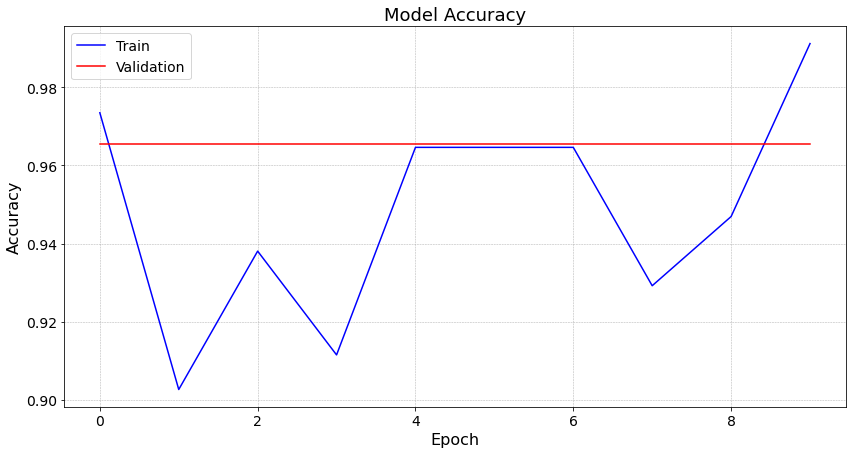

In [7]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 7))
plt.plot(history.history['accuracy'], color='blue', label='Train')
plt.plot(history.history['val_accuracy'], color='red', label='Validation')
plt.title('Model Accuracy', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Epoch', fontsize=16)
plt.legend(loc='upper left', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### Model Loss

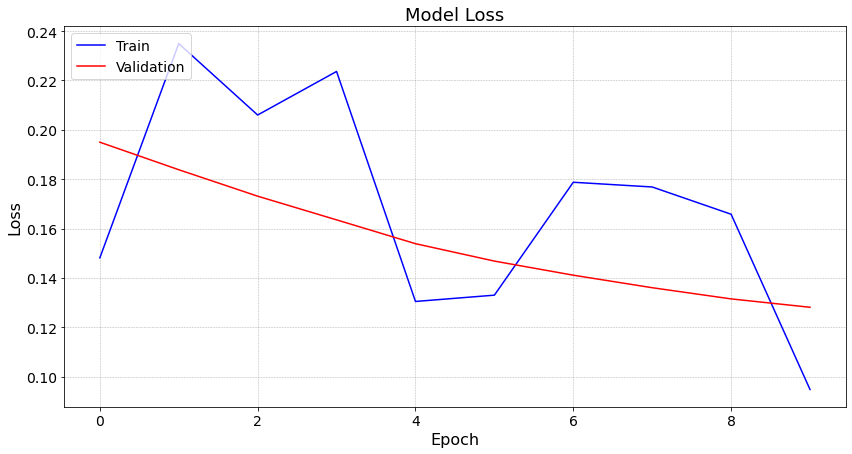

In [8]:
# Plot training & validation loss values
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], color='blue', label='Train')
plt.plot(history.history['val_loss'], color='red', label='Validation')
plt.title('Model Loss', fontsize=18)
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=16)
plt.legend(loc='upper left', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

## 8. Model Evaluation on Test Data <a id='ch8'></a>

Once our neural network model is trained, the next crucial step is to evaluate its performance on the test data. This dataset consists of samples that the model hasn't seen during training, making it an excellent benchmark to gauge the model's real-world performance.

In this section, we'll:

1. <span style="color:red">**Make Predictions**</span>: Using our trained model, we'll predict the class labels for the test set. The `predict` method returns the probabilities for each class, so we use `np.argmax` to extract the class with the highest probability as our prediction.

2. <span style="color:red">**Calculate Test Accuracy**</span>: Accuracy is a straightforward metric that quantifies the proportion of correct predictions out of the total predictions made. A higher accuracy indicates that the model's predictions align well with the actual values.

Let's proceed with the evaluation:

In [9]:
# Make predictions on the test set
y_pred = model.predict(X_test_preprocessed)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred_classes)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

2/2 [==============================] - 0s 3ms/step
Test Accuracy: 97.22%


## 9. Confusion Matrix <a id='ch9'></a>

A **Confusion Matrix** is a powerful tool to understand the performance of a classification model. It provides a detailed breakdown of true positive, true negative, false positive, and false negative predictions for each class. This granularity allows us to pinpoint specific areas where the model might be struggling.

In the matrix:
- Rows represent the **actual classes**.
- Columns represent the **predicted classes**.

The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier.

In this section, we'll:
1. <span style="color:red">**Calculate the Confusion Matrix**</span>: Using scikit-learn's `confusion_matrix` function, we'll compute the matrix for our test data predictions.
  
2. <span style="color:red">**Visualize the Matrix**</span>: We'll use Seaborn's heatmap function to visualize the confusion matrix. This visualization will help us quickly identify which classes are being confused with others.

Let's take a look at the confusion matrix for our model:

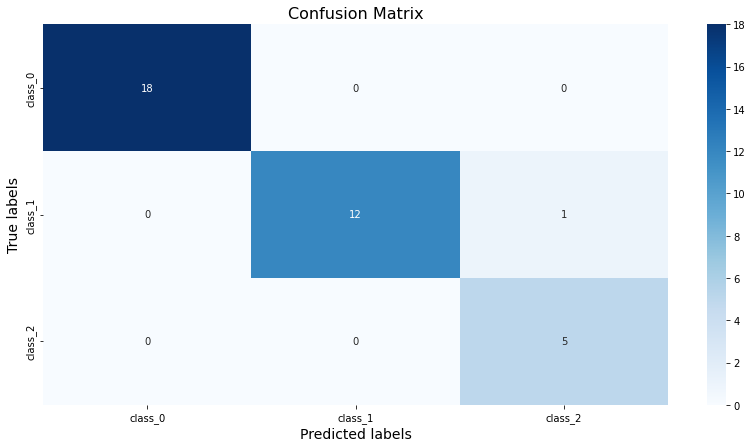

In [10]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(14, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

## 10. Classification Report <a id='ch10'></a>

After training and evaluating our neural network model, it's essential to dive deeper into its performance across different classes. A **Classification Report** provides a comprehensive breakdown of the model's performance metrics for each class, including:
- **Precision**: The ratio of correctly predicted positive observations to the total predicted positives.
- **Recall (Sensitivity)**: The ratio of correctly predicted positive observations to all observations in the actual class.
- **F1-Score**: The weighted average of Precision and Recall. It tries to find the balance between precision and recall.
- **Support**: The number of actual occurrences of the class in the specified dataset.

These metrics provide a more granular understanding of where the model excels and where it might be lacking. For instance, a high precision indicates that false positives are low, while a high recall indicates that false negatives are low.

In this section, we'll:
1. <span style="color:red">**Generate the Classification Report**</span>: Using scikit-learn's `classification_report` function, we'll compute these metrics for our test data predictions.
  
2. <span style="color:red">**Visualize the Report**</span>: To make the report more readable, we'll convert it into a pandas DataFrame and display it with enhanced formatting.

Let's take a detailed look at the classification report for our model:

In [11]:
# Set the display option for floating point numbers
pd.options.display.float_format = "{:,.2f}".format

# Generate the classification report
report = classification_report(y_test, y_pred_classes, target_names=wine.target_names, output_dict=True)

# Convert the report dictionary to a DataFrame for better visualization
report_df = pd.DataFrame(report).transpose()

# Create a custom CSS style for larger font sizes
style = """
<style>
    table {
        font-size: 24px;  
    }
    th {
        font-size: 18px; 
    }
</style>
"""

# Display the custom style
display(HTML(style))

# Display the report using Markdown
display(Markdown("### Classification Report"))
display(report_df)

### Classification Report

,precision,recall,f1-score,support
class_0,1.00,1.00,1.00,18.00
class_1,1.00,0.92,0.96,13.00
class_2,0.83,1.00,0.91,5.00
accuracy,0.97,0.97,0.97,0.97
macro avg,0.94,0.97,0.96,36.00
weighted avg,0.98,0.97,0.97,36.00


## 11. Conclusion<a id='ch11'></a>

Throughout this analysis, we embarked on a journey to understand the intricacies of the Wine dataset, exploring the relationships between various chemical properties and the types of wines. Our exploration began with building a neural network model, which provided a foundational understanding of the data's structure and the potential predictors.

The neural network model, focusing on the selected features of the dataset, achieved an impressive accuracy of 97%. This indicates that the model was able to correctly classify 97% of the wine samples into their respective types based on their chemical properties.

As we delved deeper into the model's performance, we visualized the training process, observing how the model's accuracy and loss evolved over epochs. This visualization provided insights into the model's learning trajectory, highlighting its ability to learn and adapt to the training data.

Furthermore, the **confusion matrix** and **classification report** offered a detailed breakdown of the model's performance on each class. The model showcased exceptional prowess in classifying the 'class_0' wines, achieving a precision, recall, and f1-score of 1.00. The 'class_1' wines also saw high precision and recall, with an f1-score of 0.96. The 'class_2' wines, while having a slightly lower precision of 0.83, still achieved a perfect recall, indicating that the model was able to identify all samples of this class correctly.

In conclusion, the chemical properties play a pivotal role in determining the types of wines. The neural network model's performance underscores the power of deep learning in handling classification tasks, even with a relatively small dataset like the Wine dataset. The progression from data preprocessing to model evaluation emphasizes the importance of each step in the machine learning pipeline and the potential of neural networks in making accurate classifications.